<a href="https://colab.research.google.com/github/Greta-gerasimov/ALG_2/blob/HW5_RandomForest/HW5_building__RF_entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import matplotlib.pyplot as plt
import random
from sklearn.ensemble import BaggingClassifier
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import model_selection
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc


from array import *


In [82]:
classification_data, classification_labels = datasets.make_classification(n_samples=1000,
                                                      n_features = 2, n_informative = 2, 
                                                      n_classes = 2, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=2)

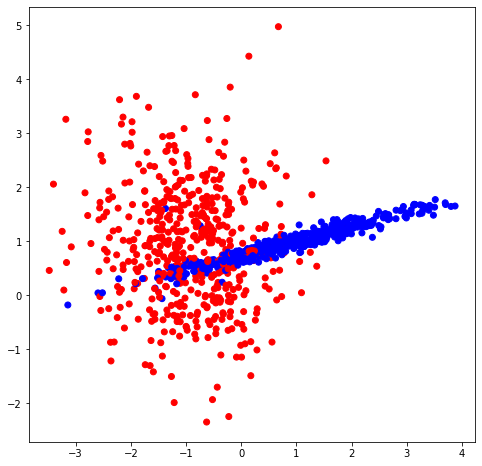

In [83]:
colors = ListedColormap(['red', 'blue'])
light_colors = ListedColormap(['lightcoral', 'lightblue'])


plt.figure(figsize=(8,8))
plt.scatter(list(map(lambda x: x[0], classification_data)), list(map(lambda x: x[1], classification_data)), 
              c=classification_labels, cmap=colors)

bootstrap

In [84]:
random.seed(42)
 
def get_bootstrap(data, labels, N):
    n_samples = data.shape[0]
    bootstrap = []
    
    for i in range(N):
        b_data = np.zeros(data.shape)
        b_labels = np.zeros(labels.shape)
        for j in range(n_samples):
            sample_index = random.randint(0, n_samples-1)
            b_data[j] = data[sample_index]
            b_labels[j] = labels[sample_index]            
        bootstrap.append((b_data, b_labels))
        
    return bootstrap
    
    
    

In [85]:
def get_subsample(len_sample):
    
    sample_indexes = [i for i in range(len_sample)]
    
    len_subsample = int(np.sqrt(len_sample))
    subsample = []
    
    random.shuffle(sample_indexes)
    for _ in range(len_subsample):
        subsample.append(sample_indexes.pop())
        
    return subsample

create the class node, leaf

In [86]:
class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  
        self.t = t 
        self.true_branch = true_branch  
        self.false_branch = false_branch 


    

In [87]:
class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        
        classes = {}  
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1 
        prediction = max(classes, key=classes.get)
        return prediction  

In [88]:
# def gini(labels):
    
#     classes = {}
#     for label in labels:
#         if label not in classes:
#             classes[label] = 0
#         classes[label] += 1
    
#     #  расчет критерия
#     impurity = 1
#     for label in classes:
#         p = classes[label] / len(labels)
#         impurity -= p ** 2
        
#     return impurity

In [89]:
enthropy

def entr(labels):
  classes = {}
  for label in labels:
    if label not in classes:
      classes[label] = 0
    classes[label] +=1

  impurity = 0
  for label in classes:
    p = classes[label]/len(labels)
    if p>0:
      impurity -=p * np.log2(p)
  return impurity,classes


NameError: ignored

In [ ]:
def quality(left_labels, right_labels, current_gini):
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_gini - p * gini(left_labels) - (1 - p) * gini(right_labels)

In [ ]:
def split(data, labels, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [ ]:
def find_best_split(data, labels):
    
 
    min_leaf = 1

    current_gini = gini(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    
    subsample = get_subsample(n_features)
    
    for index in subsample:
 
        t_values = np.unique([row[index] for row in data])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
          
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, current_gini)
            
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [ ]:
def build_tree(data, labels):

    quality, t, index = find_best_split(data, labels)
    if quality == 0:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    true_branch = build_tree(true_data, true_labels)
    false_branch = build_tree(false_data, false_labels)
    return Node(index, t, true_branch, false_branch)

In [90]:
def random_forest( data, labels, n_trees):
    
    forest = []
    bootstrap = get_bootstrap(data, labels, n_trees)
    
    for b_data, b_labels in bootstrap:
        forest.append(build_tree(b_data, b_labels))
        
    return forest

In [91]:
def classify_object(obj, node):
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [92]:
def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree)
        classes.append(prediction)
    return classes

In [93]:
def tree_vote(forest, data):
    
    predictions = []
    for tree in forest:
        predictions.append(predict(data, tree))
    
   
    predictions_per_object = list(zip(*predictions))
    voted_predictions = []
    for obj in predictions_per_object:
        voted_predictions.append(max(set(obj), key=obj.count))
        
    return voted_predictions







train/test

In [94]:


train_data, test_data, train_labels, test_labels = model_selection.train_test_split(classification_data, 
                                                                                     classification_labels, 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

In [95]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
      if actual[i] == predicted[i]:
        correct += 1
    return correct / float(len(actual)) * 100.0

n_trees = 1

In [96]:
n_trees = 1
my_forest_1 = random_forest(train_data, train_labels, n_trees)

In [97]:
train_answers_1= tree_vote(my_forest_1, train_data)
test_answers_1= tree_vote(my_forest_1, test_data)

In [98]:
# def oob_score(actual, predicted):
#   index_finding_oob  = []
#   pred_oob = []

#   for i in range(len(actual)):
#       t_values = np.unique([row[index] for row in data])

#       finding_oob = np.unique(actual[i] for predicted[i] in data)#unique
#       index_finding_oob.append(finding_oob.index[i])
#       train_answers_OOB = accuracy_metric(train_labels, index_finding_oob)
#   for i in range(index_finding_oob.size):
#       pred_oob.append(train_answers_OOB)
#       all_sequence = pred_oob + train_answers_1

#   accuracy_oob = len(all_sequence)/(len(actual))* 100.0
#   return(accuracy_oob)



In [99]:
train_accuracy_1 =  accuracy_metric(train_labels, train_answers_1)
print(f'Точность случайного леса из {n_trees} деревьев на обучающей выборке: {train_accuracy_1:.3f}')


Точность случайного леса из 1 деревьев на обучающей выборке: 95.571


In [100]:
test_accuracy_1= accuracy_metric(test_labels, test_answers_1)
print(f'Точность случайного леса из {n_trees} деревьев на тестовой выборке: {test_accuracy_1:.3f}')

Точность случайного леса из 1 деревьев на тестовой выборке: 86.000


n_trees = 3

In [101]:
n_trees = 3
my_forest_3 = random_forest(train_data, train_labels, n_trees)

In [102]:
train_answers_3 = tree_vote(my_forest_3, train_data)
test_answers_3= tree_vote(my_forest_3, test_data)

In [103]:
train_accuracy_3 = accuracy_metric(train_labels, train_answers_3)
print(f'Точность случайного леса из {n_trees} деревьев на обучающей выборке: {train_accuracy_3:.3f}')

Точность случайного леса из 3 деревьев на обучающей выборке: 97.714


In [104]:
test_accuracy_3= accuracy_metric(test_labels, test_answers_3)
print(f'Точность случайного леса из {n_trees} деревьев на тестовой выборке: {test_accuracy_3:.3f}')

Точность случайного леса из 3 деревьев на тестовой выборке: 88.000


n_trees = 10

In [105]:
n_trees = 10
my_forest_10 = random_forest(train_data, train_labels, n_trees)

In [106]:
train_answers_10 = tree_vote(my_forest_10, train_data)
test_answers_10 = tree_vote(my_forest_10, test_data)

In [107]:
train_accuracy_10 = accuracy_metric(train_labels, train_answers_10)
print(f'Точность случайного леса из {n_trees} деревьев на обучающей выборке: {train_accuracy_10:.3f}')

Точность случайного леса из 10 деревьев на обучающей выборке: 99.286


In [108]:
test_accuracy_10 = accuracy_metric(test_labels, test_answers_10)
print(f'Точность случайного леса из {n_trees} деревьев на тестовой выборке: {test_accuracy_10:.3f}')

Точность случайного леса из 10 деревьев на тестовой выборке: 89.000


n_trees = 50

In [109]:
n_trees = 50
my_forest_50 = random_forest(train_data, train_labels, n_trees)

In [110]:

test_answers = tree_vote(my_forest_50, test_data)
train_answers = tree_vote(my_forest_50, train_data)

In [111]:
train_accuracy = accuracy_metric(train_labels, train_answers)
print(f'Точность случайного леса из {n_trees} деревьев на обучающей выборке: {train_accuracy:.3f}')

Точность случайного леса из 50 деревьев на обучающей выборке: 99.714


In [112]:
test_accuracy = accuracy_metric(test_labels, test_answers)
print(f'Точность случайного леса из {n_trees} деревьев на тестовой выборке: {test_accuracy:.3f}')

Точность случайного леса из 50 деревьев на тестовой выборке: 91.667


creating  plots

(37830, 0) (37830, 1) (37830, 1)


Text(0.5, 1.0, 'Test accuracy=86.00')

<Figure size 1440x576 with 0 Axes>

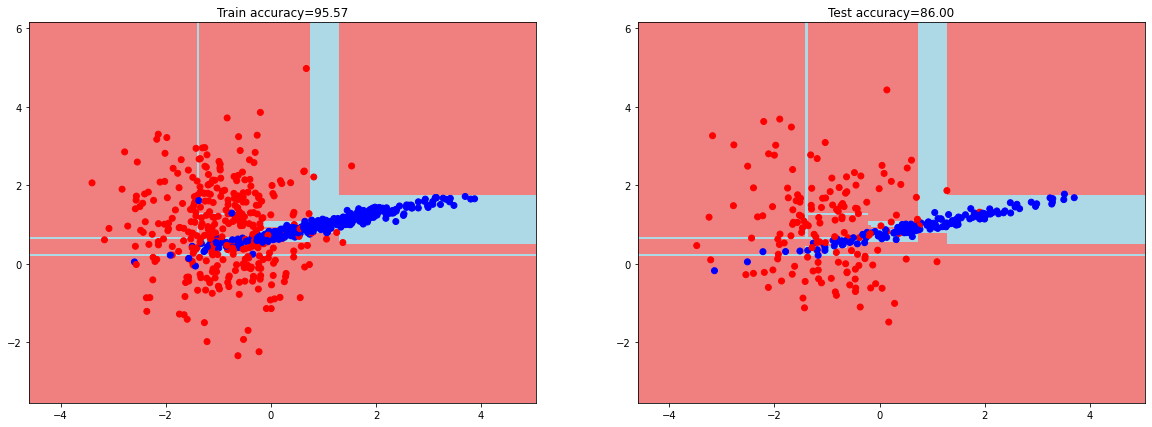

In [113]:
#n_trees = 1
def get_meshgrid(data, step=.05, border=1.2):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    xx, yy = np.meshgrid(np.arange(x_min,x_max,step),np.arange(y_min,y_max,step))
    x = xx.reshape(-1,1)
    y = yy.reshape(-1,1)
    f = np.ones((x.shape[0],data[:,2:].shape[1]))
    print(f.shape,x.shape,y.shape)
    data_gr = np.concatenate((x,y,f),axis=1)


    return xx,yy,data_gr

plt.figure(figsize =(20,8))
plt.figure(figsize = (20,7))

#train
plt.subplot(1,2,1)
xx, yy,gr = get_meshgrid(train_data)
mesh_predictions = np.array(tree_vote(my_forest_1,gr)).reshape(xx.shape)
plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, cmap = colors)
plt.title(f'Train accuracy={train_accuracy_1:.2f}')

# график тестовой выборки
plt.subplot(1,2,2)
plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, cmap = colors)
plt.title(f'Test accuracy={test_accuracy_1:.2f}')

(37830, 0) (37830, 1) (37830, 1)


Text(0.5, 1.0, 'Test accuracy=88.00')

<Figure size 1440x576 with 0 Axes>

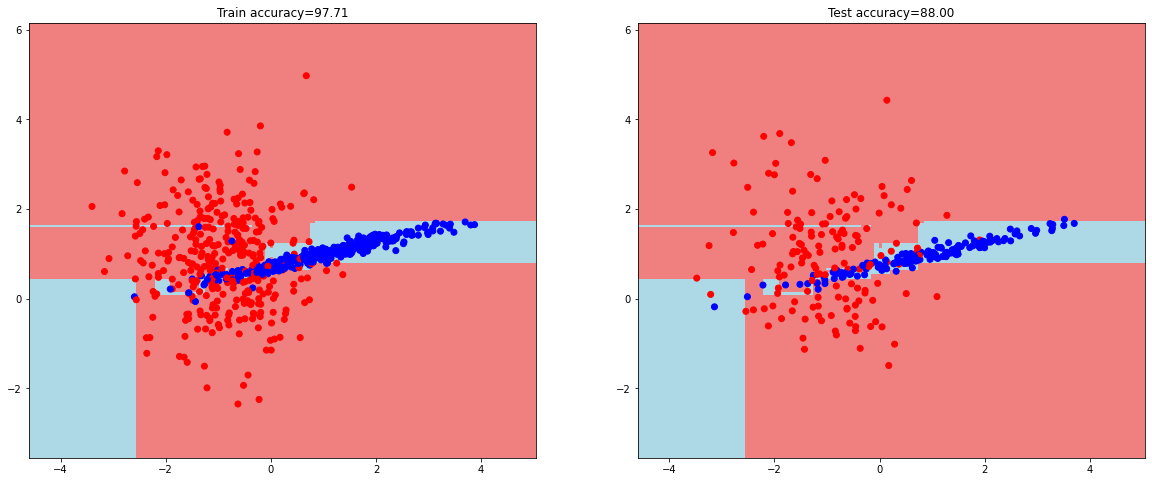

In [114]:
#n_trees = 3
def get_meshgrid(data, step=.05, border=1.2):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    xx, yy = np.meshgrid(np.arange(x_min,x_max,step),np.arange(y_min,y_max,step))
    x = xx.reshape(-1,1)
    y = yy.reshape(-1,1)
    f = np.ones((x.shape[0],data[:,2:].shape[1]))
    print(f.shape,x.shape,y.shape)
    data_gr = np.concatenate((x,y,f),axis=1)


    return xx,yy,data_gr

plt.figure(figsize =(20,8))
plt.figure(figsize = (20,8))

#train
plt.subplot(1,2,1)
xx, yy,gr = get_meshgrid(train_data)
mesh_predictions = np.array(tree_vote(my_forest_3,gr)).reshape(xx.shape)
plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, cmap = colors)
plt.title(f'Train accuracy={train_accuracy_3:.2f}')

# график тестовой выборки
plt.subplot(1,2,2)
plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, cmap = colors)
plt.title(f'Test accuracy={test_accuracy_3:.2f}')

(37830, 0) (37830, 1) (37830, 1)


Text(0.5, 1.0, 'Test accuracy=89.00')

<Figure size 1440x576 with 0 Axes>

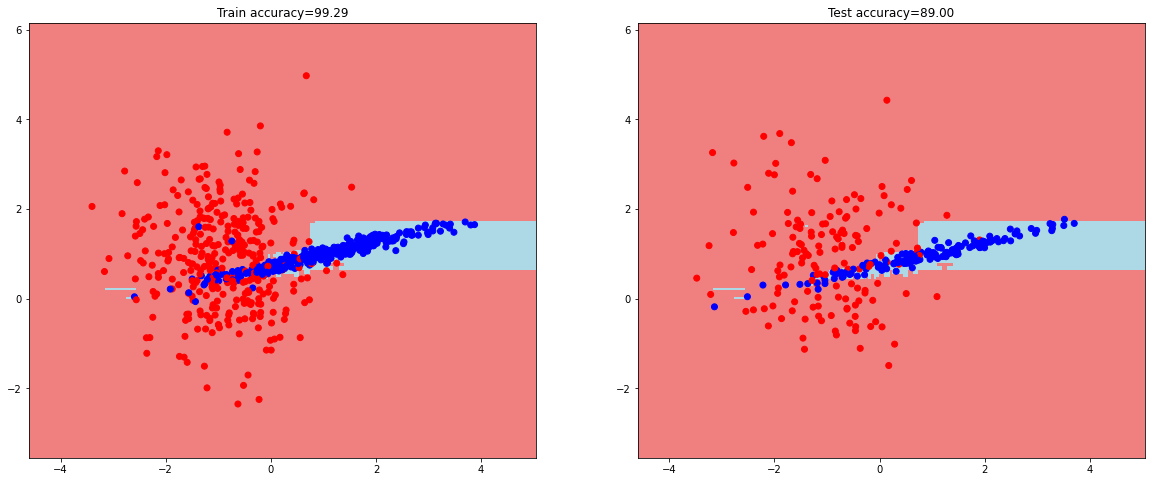

In [115]:
#n_trees = 10
def get_meshgrid(data, step=.05, border=1.2):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    xx, yy = np.meshgrid(np.arange(x_min,x_max,step),np.arange(y_min,y_max,step))
    x = xx.reshape(-1,1)
    y = yy.reshape(-1,1)
    f = np.ones((x.shape[0],data[:,2:].shape[1]))
    print(f.shape,x.shape,y.shape)
    data_gr = np.concatenate((x,y,f),axis=1)


    return xx,yy,data_gr

plt.figure(figsize =(20,8))
plt.figure(figsize = (20,8))

#train
plt.subplot(1,2,1)
xx, yy,gr = get_meshgrid(train_data)
mesh_predictions = np.array(tree_vote(my_forest_10,gr)).reshape(xx.shape)
plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, cmap = colors)
plt.title(f'Train accuracy={train_accuracy_10:.2f}')

# график тестовой выборки
plt.subplot(1,2,2)
plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, cmap = colors)
plt.title(f'Test accuracy={test_accuracy_10:.2f}')


(37830, 0) (37830, 1) (37830, 1)


Text(0.5, 1.0, 'Test accuracy=91.67')

<Figure size 1440x576 with 0 Axes>

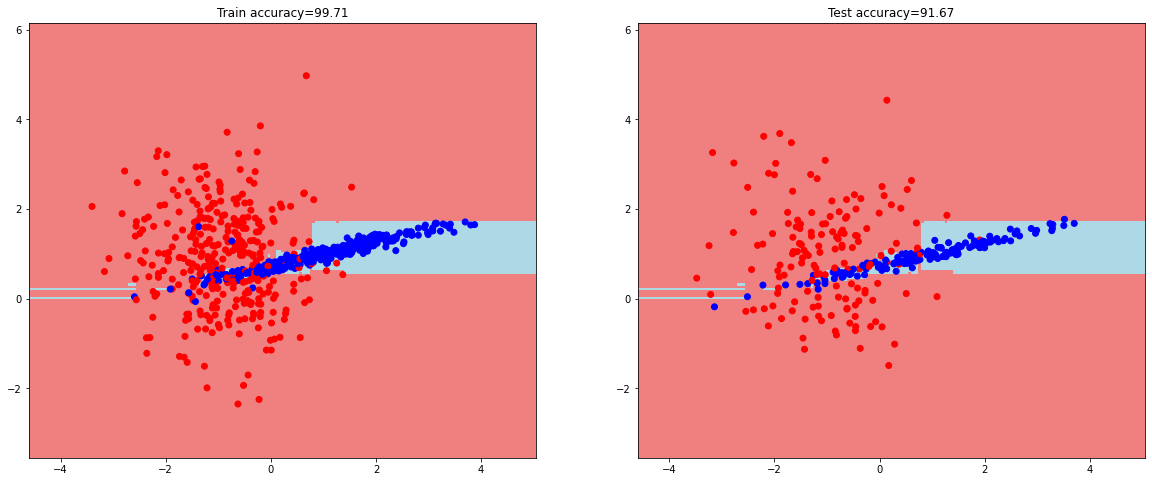

In [116]:
#n_trees = 50
def get_meshgrid(data, step=.05, border=1.2):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    xx, yy = np.meshgrid(np.arange(x_min,x_max,step),np.arange(y_min,y_max,step))
    x = xx.reshape(-1,1)
    y = yy.reshape(-1,1)
    f = np.ones((x.shape[0],data[:,2:].shape[1]))
    print(f.shape,x.shape,y.shape)
    data_gr = np.concatenate((x,y,f),axis=1)


    return xx,yy,data_gr

plt.figure(figsize =(20,8))
plt.figure(figsize = (20,8))

#train
plt.subplot(1,2,1)
xx, yy,gr = get_meshgrid(train_data)
mesh_predictions = np.array(tree_vote(my_forest_50,gr)).reshape(xx.shape)
plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, cmap = colors)
plt.title(f'Train accuracy={train_accuracy:.2f}')

# график тестовой выборки
plt.subplot(1,2,2)
plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, cmap = colors)
plt.title(f'Test accuracy={test_accuracy:.2f}')


По графикам очевидно, что глубина деревьев существенно влияет на узость того пространства , в котором происходит сортировка классов. чем больше лес, тем более сложные закономерности находит модель, и, как  итог, - результирующий  вывод - усреднение этих закономерностей. при этом, при увеличении количества деревьев до 50 лес не переобучается.

out_of_bag

In [117]:
 #n_trees=1
SEED = 42
base_rf = RandomForestClassifier(max_depth=4,min_samples_leaf=1,random_state=SEED)

bc = BaggingClassifier(base_estimator =base_rf,
                          n_estimators = 1,oob_score=True,
                          n_jobs=-1)

In [118]:
bc.fit(train_data,train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=4,
                                                        random_state=42),
                  n_estimators=1, n_jobs=-1, oob_score=True)

In [119]:
labels_predict = bc.predict(test_data)

In [120]:
test_accuracy=accuracy_score(test_labels,labels_predict)

In [121]:
oob_accuracy = bc.oob_score_


In [122]:
print('test set accuracy:{:.3f}'.format(test_accuracy))

test set accuracy:0.867


In [123]:
print('OOB accuracy:{:.3f}'.format(oob_accuracy))

OOB accuracy:0.650


In [124]:

print('Random forest', classification_report(test_labels,labels_predict), sep = '\n')


Random forest
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       155
           1       0.91      0.80      0.85       145

    accuracy                           0.87       300
   macro avg       0.87      0.86      0.87       300
weighted avg       0.87      0.87      0.87       300



In [125]:
print('roc_auc_score', roc_auc_score(test_labels,labels_predict))



roc_auc_score 0.8645161290322582


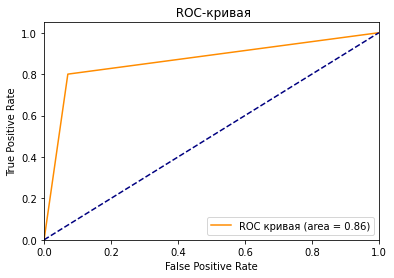

In [126]:
fpr, tpr, treshold = roc_curve(test_labels,labels_predict)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC-кривая')
plt.legend(loc="lower right")
plt.show()

In [127]:
 #n_trees=3
SEED = 42
base_rf = RandomForestClassifier(max_depth=4,min_samples_leaf=1,random_state=SEED)

bc = BaggingClassifier(base_estimator =base_rf,
                          n_estimators = 3,oob_score=True,
                          n_jobs=-1)

In [128]:
bc.fit(train_data,train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=4,
                                                        random_state=42),
                  n_estimators=3, n_jobs=-1, oob_score=True)

In [129]:
labels_predict = bc.predict(test_data)

In [130]:
test_accuracy=accuracy_score(test_labels,labels_predict)

In [131]:
oob_accuracy = bc.oob_score_


In [132]:
print('test set accuracy:{:.3f}'.format(test_accuracy))

test set accuracy:0.867


In [133]:
print('OOB accuracy:{:.3f}'.format(oob_accuracy))

OOB accuracy:0.814


In [134]:

print('Random forest', classification_report(test_labels,labels_predict), sep = '\n')


Random forest
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       155
           1       0.90      0.81      0.86       145

    accuracy                           0.87       300
   macro avg       0.87      0.86      0.87       300
weighted avg       0.87      0.87      0.87       300



In [135]:
print('roc_auc_score', roc_auc_score(test_labels,labels_predict))



roc_auc_score 0.8649610678531701


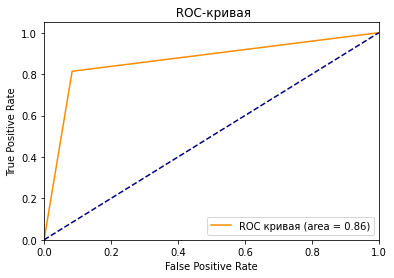

In [136]:
fpr, tpr, treshold = roc_curve(test_labels,labels_predict)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC-кривая')
plt.legend(loc="lower right")
plt.show()

Две полученные точности не совсем равны, хотя уже близки. 

In [137]:
 #n_trees=10
SEED = 42
base_rf = RandomForestClassifier(max_depth=4,min_samples_leaf=1,random_state=SEED)

bc = BaggingClassifier(base_estimator =base_rf,
                          n_estimators = 10,oob_score=True,
                          n_jobs=-1)

In [138]:
bc.fit(train_data,train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=4,
                                                        random_state=42),
                  n_jobs=-1, oob_score=True)

In [139]:
labels_predict = bc.predict(test_data)

In [140]:
test_accuracy=accuracy_score(test_labels,labels_predict)

In [141]:
oob_accuracy = bc.oob_score_


In [142]:
print('test set accuracy:{:.3f}'.format(test_accuracy))

test set accuracy:0.870


In [143]:
print('OOB accuracy:{:.3f}'.format(oob_accuracy))

OOB accuracy:0.904


In [144]:

print('Random forest', classification_report(test_labels,labels_predict), sep = '\n')


Random forest
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       155
           1       0.91      0.81      0.86       145

    accuracy                           0.87       300
   macro avg       0.88      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



In [145]:
print('roc_auc_score', roc_auc_score(test_labels,labels_predict))



roc_auc_score 0.867964404894327


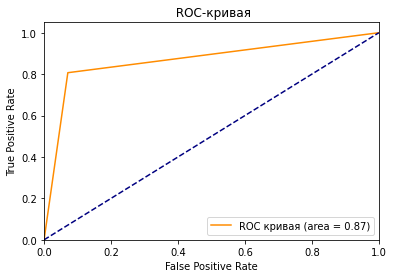

In [146]:
fpr, tpr, treshold = roc_curve(test_labels,labels_predict)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC-кривая')
plt.legend(loc="lower right")
plt.show()

In [147]:
 #n_trees=50
SEED = 42
base_rf = RandomForestClassifier(max_depth=4,min_samples_leaf=1,random_state=SEED)

bc = BaggingClassifier(base_estimator =base_rf,
                          n_estimators = 50,oob_score=True,
                          n_jobs=-1)

In [152]:
bc.fit(train_data,train_labels)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=4,
                                                        random_state=42),
                  n_estimators=50, n_jobs=-1, oob_score=True)

In [153]:
labels_predict = bc.predict(test_data)

In [154]:
test_accuracy=accuracy_score(test_labels,labels_predict)

In [155]:
oob_accuracy = bc.oob_score_


In [156]:
print('test set accuracy:{:.3f}'.format(test_accuracy))

test set accuracy:0.883


In [157]:
print('OOB accuracy:{:.3f}'.format(oob_accuracy))

OOB accuracy:0.914


In [158]:

print('Random forest', classification_report(test_labels,labels_predict), sep = '\n')


Random forest
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       155
           1       0.92      0.83      0.87       145

    accuracy                           0.88       300
   macro avg       0.89      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300



In [159]:
print('roc_auc_score', roc_auc_score(test_labels,labels_predict))



roc_auc_score 0.8817575083426029


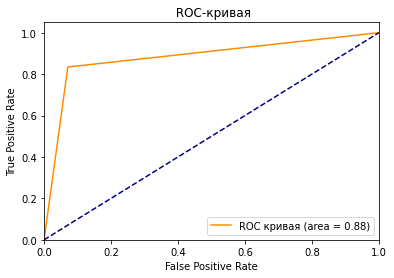

In [160]:
fpr, tpr, treshold = roc_curve(test_labels,labels_predict)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC-кривая')
plt.legend(loc="lower right")
plt.show()

вывод по OOB:

Две полученные точности  зависят напрямую от глубины дерева, с повышением глубины, увеличиается OOB accuracy. Эти результаты показывают, как OOB-оценка может быть эффективным методом для получения оценки производительности  ансамбля на невидимых данных без выполнения перекрестной проверки.

Мои крайне недлинные в этот раз  вопросы.

1. Довольно сильно встряла с out_of_bag. ресурсов конечно  на данную тему куча, но все про библ.

я попыталась написать код сама, основываясь на том понимании, которое получила, пытаясь найти хоть что-то на гитхабе.

а. мой вариант, с индексированием и поиском уникальных значений,оставшиеся вне выборки бутстрэпа. но у меня возник затык с индексированием, возможно мне кто-то когда-то сможет помочь, но это все очень плохо. я вообще много чего там потерла, потому что вообще ничего не пашет и все тут. отправляю какой-то уже отчаянный вариант. у меня есть пара подозрений на счет того, что я что-то использую не в том формате. но как все выправить, пока не знаю.

б.вариант самый како-то простой, видимо по  аналогии с  вероятностью попадания конкретного объекта в подвыборку (1 - 1/l):

  (библиотечный вариант)
  oob_error = 1 - clf.oob_score_

  or
  (не библиотечный вариант)
    accuracy = float(results.count(True)) / float(len(results))

    print("accuracy: %.4f" % accuracy)
    print("OOB estimate: %.4f" % (1 - accuracy))


в. вариант с использованием Random Forest "out of bag" RMSE.
если я верно понимаю, здесь мы ищем среднеквадратичное отклонение n_tree, и мы можем усреднить их, чтобы получить среднее среднеквадратичное отклонение наблюдений OOB.

не знаю, насколько данную метрику нужно использовать.


в целом, все плохо, как обычно.

безусловно, мне ничего не оставалось, как просто посчитать все с библиотеками.

Если существует микровероятность, то возможно ли посмотреть на реализацию нормального кода OOB? 

Меня несколько удивляет кстати отсутствие в книжках по ML реализации кода без библиотечных загрузок(ведь то было бы намного полезнее, чем три строчки, повторяющиеся из одного ресурса к другому).

2. вопрос по поводу метрики. можно ли использовать в данном случае roc_auc? или непременно accuracy?

3. что касается интерпретации overfitting & underfitting.

так как я не очень пока разбираюсь в том, как можно визуально оценить гиперплоскость(и вообще это корректно или нет?), то можно ли использовать в данном задании recall & precision?я на всякий случай написала код для этого и построила график roc_auc/ лишнее это или нет?
----насколько видно из репорта и графика,  в целом, количество деревьев не сильно влияет на данные метрики, начиная с 3. 


спасибо!